In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import math

import utility.io_utility as io
import utility.animation_utility as anim

In [2]:
def burning(result):
    return np.sum(result[:,:,:,1], axis = (1,2))

In [3]:
def burned(result):
    return np.sum(result[:,:,:,5], axis = (1,2))

In [4]:
def burningPlusBurned(result):
    tmp = result[:,:,:,1] * result[:,:,:,5]
    return burning(result) + burned(result) - np.sum(np.where(tmp == 1, 1, 0), axis = (1,2)) # Abziehen was brennt + schon gebrannt hat

In [5]:
def derivative(array):
    x = np.arange(array.size)
    y = array
    y_ = np.diff(y) / np.diff(x)
    x_ = (x[:-1] + x[1:]) / 2
    return y_

In [6]:
def burning_radius(result):
    return np.sqrt(burningPlusBurned(result)/np.pi)

In [7]:
def schwerpunkt(result):
    out = []
    t = 0
    while t < result[:,0,0,1].size:
        tmp = result[t,:,:,1] + result[t,:,:,5] - result[t,:,:,1] * result[t,:,:,5]
        (x, y) = np.where(tmp == 1)
        out.append(np.array([np.sum(x)/burningPlusBurned(result)[t], np.sum(y)/burningPlusBurned(result)[t]]))
        t = t+1
    
    return np.array(out)
#schwerpunkt(path)[t][y=1 x=0]

In [8]:
#gibt alle koordinaten der Brenndenen Zellen an
def koord(result):
    out = []
    for t in np.arange(result[:,0,0,1].size):
        tmp = result[t,:,:,1] + result[t,:,:,5] - result[t,:,:,1] * result[t,:,:,5]
        (x,y) = np.where(tmp ==1)
        out.append([x,y])
    #out[t][0 = x 1 = y][Zelle]  
    return out

In [9]:
def gradius(result,t):
    k = koord(result)
    s = schwerpunkt(result)
    time = np.arange(result[:,0,0,1].size)
    tmp = []
    
    
    for x in np.arange(k[t][0].size):      
        y = (k[t][0][x]-s[t][0])**2 + (k[t][1][x]-s[t][1])**2
        tmp.append([y])
        out = math.sqrt(np.sum(tmp)/len(tmp))
    return out

In [10]:
def radius(result):
    out = np.zeros([result[:,0,0,1].size])
    t = 0
    while t < result[:,0,0,1].size:
        out[t] = gradius(result,t)
        t = t + 1
    return out

In [11]:
def gyration(result):
    return radius(result)/burning_radius(result)

In [81]:
def plot(datas, function_index, color):
    names = ["Brandfläche","Brandgeschwindigkeit","Radius","Radiusänderung"]
    for d in datas:
        y = d[function_index]
        x = np.arange(y.size)
        plt.plot(x, y, color, label = "Model")
    plt.xlabel("Zeit [h]")
    plt.ylabel(names[function_index])
    #plt.legend()
    plt.grid()

In [16]:
def evaluate(results):
    out = []
    
    
    for r in results:
        bpb = burningPlusBurned(r)
        dbpb = derivative(bpb)
        rad = burning_radius(r)
        drad = derivative(rad)
        #grad = radius(r)
        #gyprad =  grad/rad
        out.append(np.array([bpb,dbpb,rad,drad],dtype=object))
    
    return out

In [106]:
def mean_values(evaluation):
    out = []
    for e in evaluation:
        tmp = []
        for j in e:
            tmp.append(np.mean(j))
        out.append(tmp)
    return out

In [119]:
def mean_func(means,index_value):
    out = []
    for m in means:
        out.append(m[index_value])
    return out

In [31]:
burningPlusBurned(io.read("data/result_output_vari"))

array([  1.,   2.,   3.,   5.,   9.,  15.,  23.,  33.,  43.,  58.,  74.,
        94., 113., 129., 147., 173., 194., 211., 238., 259.])

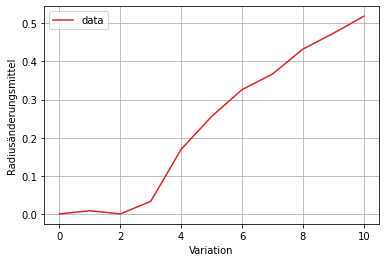

In [142]:
y = mean_func(mean_values(evaluate(io.read("data/result_output_vari"))),3)
x = np.arange(len(y))
plt.plot(x, y, "C3", label = "data")

plt.xlabel("Variation")
plt.ylabel("Radiusänderungsmittel")
plt.legend()
plt.grid()



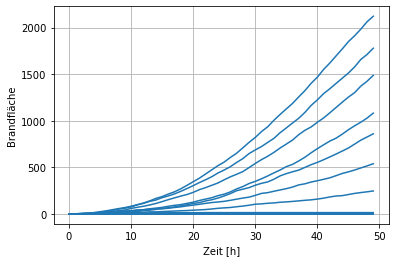

In [141]:
plot(evaluate(io.read("data/result_output_vari")), 0, "C0")

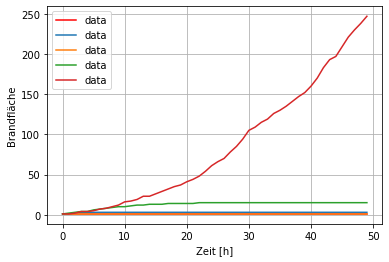

In [140]:
y = evaluate(io.read("data/result_output_vari"))[0][0]
x = np.arange(y.size)
plt.plot(x, y, "red", label = "data")

y = evaluate(io.read("data/result_output_vari"))[1][0]
x = np.arange(y.size)
plt.plot(x, y, "C0", label = "data")

y = evaluate(io.read("data/result_output_vari"))[2][0]
x = np.arange(y.size)
plt.plot(x, y, "C1", label = "data")

y = evaluate(io.read("data/result_output_vari"))[3][0]
x = np.arange(y.size)
plt.plot(x, y, "C2", label = "data")

y = evaluate(io.read("data/result_output_vari"))[4][0]
x = np.arange(y.size)
plt.plot(x, y, "C3", label = "data")

plt.xlabel("Zeit [h]")
plt.ylabel("Brandfläche")
plt.legend()
plt.grid()

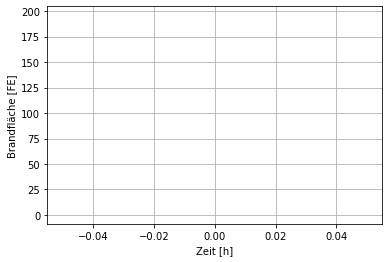

In [52]:

plot(evaluate(io.read("data/result_output_vari"))[1][0], "Brandfläche [FE]", "C0")

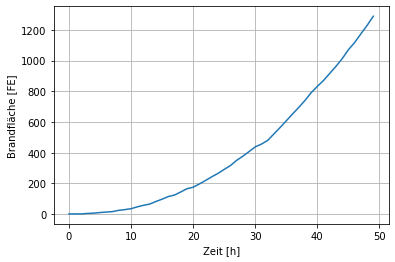

In [33]:
plot(burningPlusBurned(io.read("data/result_output_burned1")), "Brandfläche [FE]", "C0")

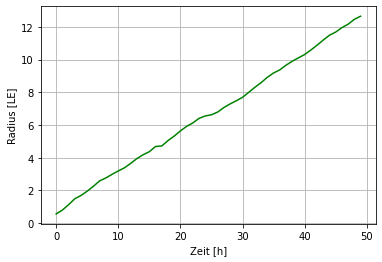

In [15]:
#plot(burning_radius("data/result_output"), "Radius [LE]", "green")
plot(burning_radius("data/result_output_burned"), "Radius [LE]", "green")

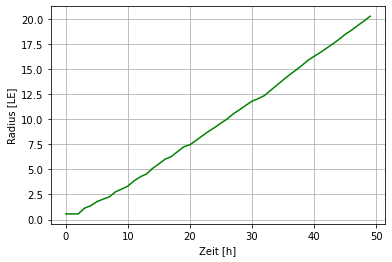

In [16]:
plot(burning_radius("data/result_output_burned1"), "Radius [LE]", "green")

In [17]:
# anim.animate("data/result_output2")

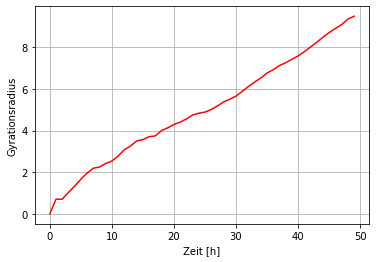

In [18]:
plot(radius("data/result_output_burned"), "Gyrationsradius", "r") # wind = 0

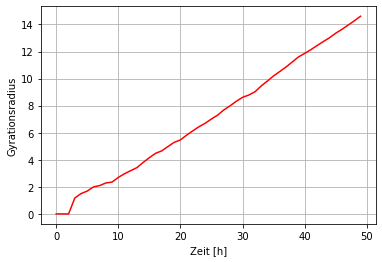

In [19]:
plot(radius("data/result_output_burned1"), "Gyrationsradius", "r") 

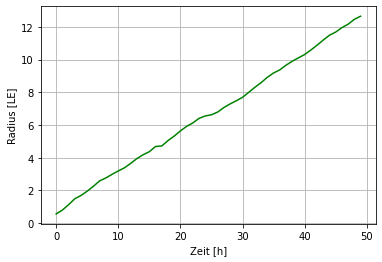

In [20]:
plot(burning_radius("data/result_output_burned"), "Radius [LE]", "green")

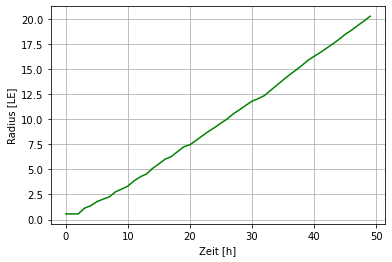

In [21]:
plot(burning_radius("data/result_output_burned1"), "Radius [LE]", "green")

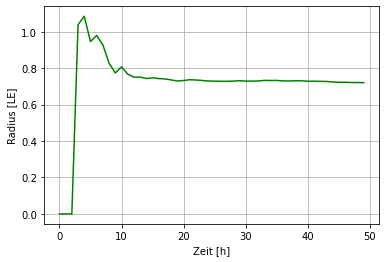

In [22]:
plot(gyration("data/result_output_burned1"),"Radius [LE]", "green")

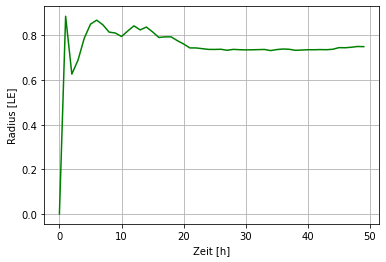

In [23]:
plot(gyration("data/result_output_burned"),"Radius [LE]", "green")

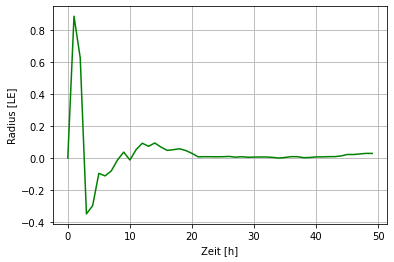

In [24]:
plot(gyration("data/result_output_burned")-gyration("data/result_output_burned1"), "Radius [LE]", "green")